In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import os
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [4]:
OneHotEncoder

sklearn.preprocessing._encoders.OneHotEncoder

In [5]:
data=[]
paths=[]
result=[]


for r,d,f in os.walk("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape ==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
paths=[]

for r,d,f in os.walk("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape ==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result=np.array(result)
result=result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,random_state=0,shuffle=True)

In [10]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [11]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [12]:
x_test

array([[[[ 44,  48,  49],
         [ 45,  49,  50],
         [ 45,  49,  50],
         ...,
         [ 45,  49,  50],
         [ 45,  49,  50],
         [ 45,  49,  50]],

        [[ 44,  48,  49],
         [ 45,  49,  50],
         [ 45,  49,  50],
         ...,
         [ 45,  49,  50],
         [ 45,  49,  50],
         [ 45,  49,  50]],

        [[ 44,  48,  49],
         [ 45,  49,  50],
         [ 45,  49,  50],
         ...,
         [ 45,  49,  50],
         [ 45,  49,  50],
         [ 45,  49,  50]],

        ...,

        [[ 43,  47,  48],
         [ 43,  47,  48],
         [ 44,  48,  49],
         ...,
         [ 44,  48,  49],
         [ 44,  48,  49],
         [ 44,  48,  49]],

        [[ 43,  47,  48],
         [ 43,  47,  48],
         [ 44,  48,  49],
         ...,
         [ 44,  48,  49],
         [ 44,  48,  49],
         [ 44,  48,  49]],

        [[ 43,  47,  48],
         [ 43,  47,  48],
         [ 44,  48,  49],
         ...,
         [ 44,  48,  49],
        

In [13]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3),padding='same'))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu',padding='same'))

In [16]:
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(64, kernel_size=(2,2), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu',padding='same'))

In [18]:
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [21]:
model.compile(loss="categorical_crossentropy",optimizer='Adamax')

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [23]:
y_train.shape

(111, 2)

In [24]:
y_train_encoded = np.argmax(y_train, axis=1)


In [25]:
history=model.fit(x_train,y_train,epochs=30,batch_size=40,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
3/3 [==============================] - 8s 2s/step - loss: 35.0166 - val_loss: 96.6846
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 19.4812 - val_loss: 21.5450
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 4.0977 - val_loss: 21.9064
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 4.2851 - val_loss: 3.7984
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 1.2982 - val_loss: 13.6646
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 1.7105 - val_loss: 15.8270
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.7528 - val_loss: 11.1973
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.8433 - val_loss: 5.9203
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.4297 - val_loss: 3.6829
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.2283 - val_loss: 3.3677
Epoch 11/30
3/3 [========================

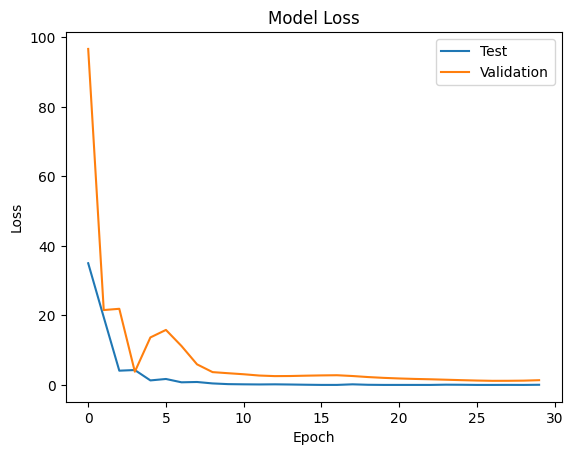

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test','Validation'],loc='upper right')

In [27]:
def names(number):
    if(number==0):
        return "It's a tumor"
    else:
        return "It's not a tumor"

100.0% confidence . It's not a tumor


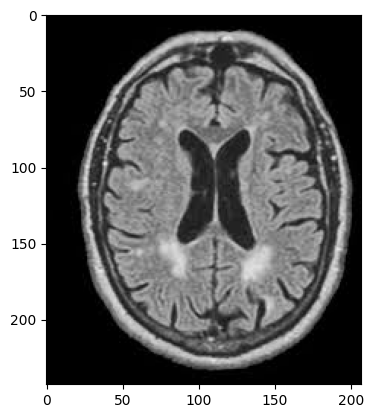

In [28]:
from matplotlib.pyplot import imshow
img=Image.open(r"/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/22 no.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence . ' + names(classification))

100.0% confidence . It's a tumor


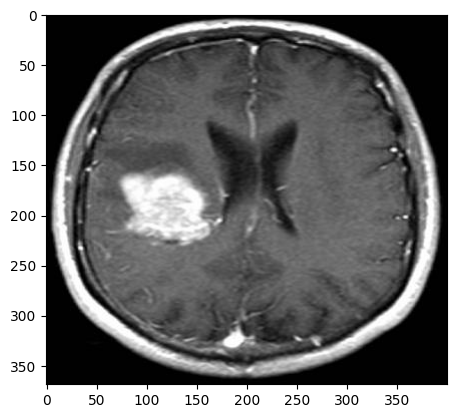

In [29]:
from matplotlib.pyplot import imshow
img=Image.open("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y11.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence . ' + names(classification))

In [30]:
model.save('/kaggle/working/brainTumor.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
